In [11]:
import numpy as np
import corner
import h5py
import json

import matplotlib.pyplot as plt

from pycbc.conversions import mass1_from_mchirp_q, mass2_from_mchirp_q
# import ligo.skymap.plot
import pycbc
from matplotlib.lines import Line2D

from pycbc.types.frequencyseries import FrequencySeries
from pycbc.conversions import mass1_from_mchirp_eta, mass2_from_mchirp_eta


In [ ]:
# ax = plt.axes(projection='astro hours mollweide')
# ax.grid()

In [ ]:
file = h5py.File('gw170817_post_samples.hdf', 'r')

names = ['mchirp', 'q', 'spin1z', 'spin2z', 'inclination', 'ra', 'dec', 'distance', 'logwt']

samples_pe = []

for key in names:
    
    samples_pe.append(np.array(file['samples'][key]))
    
samples_pe = np.array(samples_pe).T

m1, m2 = mass1_from_mchirp_q(samples_pe[:,0], samples_pe[:,1]), mass2_from_mchirp_q(samples_pe[:,0], samples_pe[:,1])
chi_eff = (m1*samples_pe[:,2] + m2*samples_pe[:,3])/(m1 + m2)

samples_pe_new = np.empty((len(chi_eff), 7))

samples_pe_new[:,0] = samples_pe[:,0]
samples_pe_new[:,1] = samples_pe[:,1]
samples_pe_new[:,2] = chi_eff
samples_pe_new[:,3] = samples_pe[:,4]
samples_pe_new[:,4] = samples_pe[:,5]
samples_pe_new[:,5] = samples_pe[:,6]
samples_pe_new[:,6] = samples_pe[:,7]

map_vals = np.zeros(7)

for i in range(7):

    count, val = np.histogram(samples_pe_new[:,i], 25)
    map_vals[i] = val[np.argmax(count)]


In [12]:
#-- reading raw pe samples --
    
file = h5py.File('samples_data_pycbc_500_walks_100_226.20016581614811.hdf5', 'r')

mchirp, q, s1z = np.array(file['mchirp']), np.array(file['eta']), np.array(file['s1z'])    
s2z, iota, ra, dec = np.array(file['s2z']), np.array(file['inc']), np.array(file['ra']), np.array(file['dec'])
distance =  np.array(file['distance'])  

logwt = np.array(file['logwt'])
logz = np.array(file['logz'])
logl = np.array(file['logl'])

wts =  np.exp(logwt - logz[-1])

file.close()

samples = np.zeros((len(mchirp), 8))
samples[:,0], samples[:,1], samples[:,2], samples[:,3], samples[:,4], samples[:,5] = mchirp, q, s1z, s2z, iota, ra
samples[:,6], samples[:,7] = dec, distance
effective_size = int(len(wts)/(1+(wts/wts.mean() - 1)**2).mean())

# print('effective size: %d'%effective_size)
np.random.seed(0)
eff_samps_index = np.random.choice(mchirp.shape[0], effective_size, p=wts, replace=False)
eff_samps = samples[eff_samps_index]
eff_samps_llr = logl[eff_samps_index]

m1 = mass1_from_mchirp_q(eff_samps[:,0], eff_samps[:,1])
m2 = mass2_from_mchirp_q(eff_samps[:,0], eff_samps[:,1])
chi_eff = (eff_samps[:,2]*m1 + eff_samps[:,3]*m2)/(m1+m2)

# -- effecitve samples in mchirp, eta, chi_eff, D, tc
eff_samps_new_pycbc = np.zeros((effective_size, 7))

eff_samps_new_pycbc[:,0] = eff_samps[:,0]
eff_samps_new_pycbc[:,1] = eff_samps[:,1]
eff_samps_new_pycbc[:,2] = chi_eff
eff_samps_new_pycbc[:,3] = eff_samps[:,4]
eff_samps_new_pycbc[:,4] = eff_samps[:,5]
eff_samps_new_pycbc[:,5] = eff_samps[:,6]
eff_samps_new_pycbc[:,6] = eff_samps[:,7]


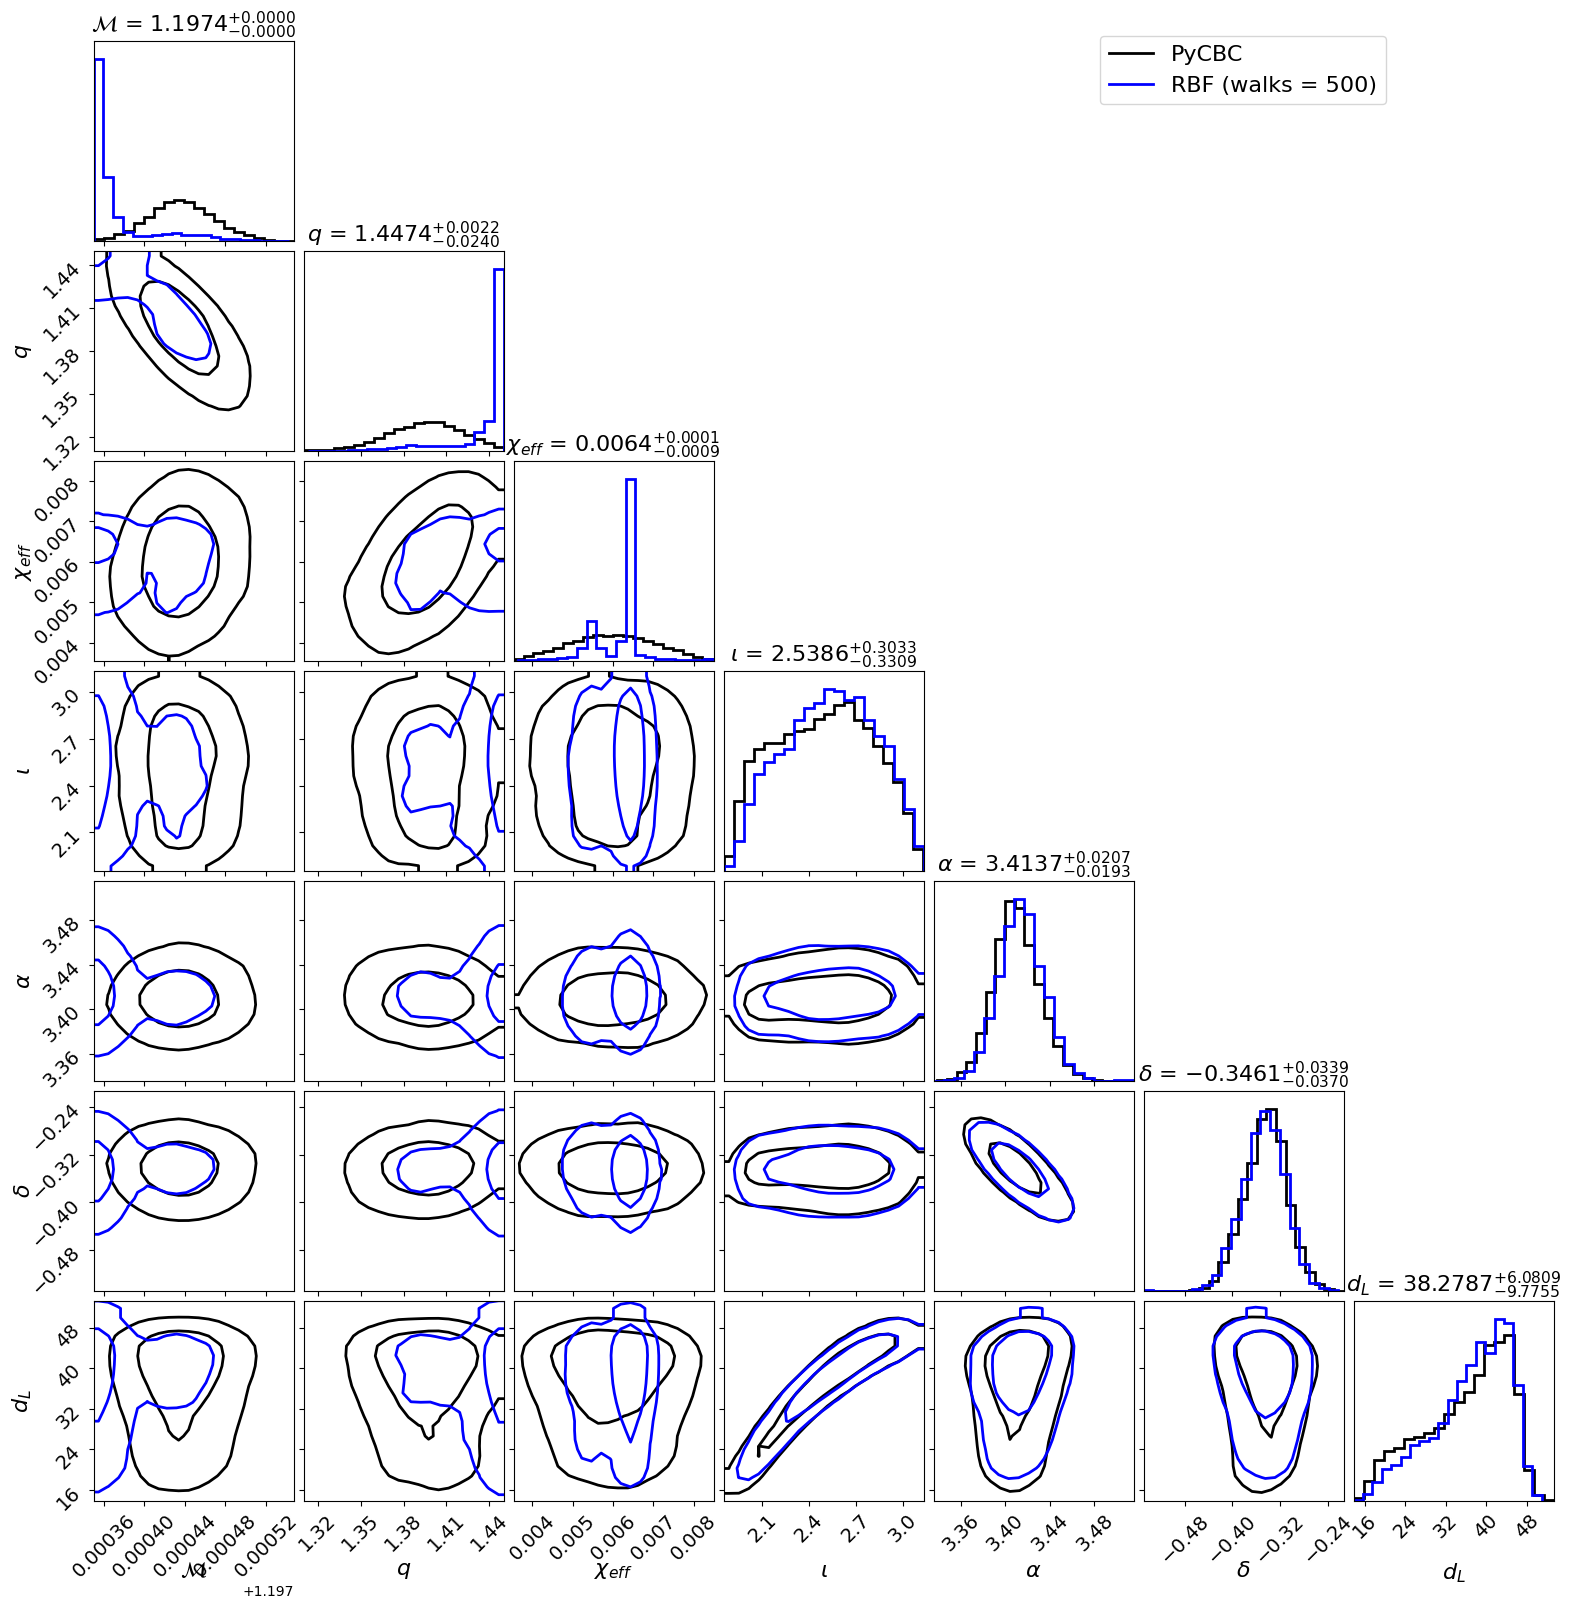

In [20]:
#-- reading raw pe samples --
    
file = h5py.File('samples_data_interpolated_500_GW170817_800_nwalks_100_nodeSeed_1_gauss_frac_0.1.hdf5', 'r')

mchirp, q, s1z = np.array(file['mchirp']), np.array(file['q']), np.array(file['s1z'])    
s2z, iota, ra, dec = np.array(file['s2z']), np.array(file['inc']), np.array(file['ra']), np.array(file['dec'])
distance =  np.array(file['distance'])  

logwt = np.array(file['logwt'])
logz = np.array(file['logz'])
logl = np.array(file['logl'])

wts =  np.exp(logwt - logz[-1])

file.close()

samples = np.zeros((len(mchirp), 8))
samples[:,0], samples[:,1], samples[:,2], samples[:,3], samples[:,4], samples[:,5] = mchirp, q, s1z, s2z, iota, ra
samples[:,6], samples[:,7] = dec, distance
effective_size = int(len(wts)/(1+(wts/wts.mean() - 1)**2).mean())

# print('effective size: %d'%effective_size)
np.random.seed(0)
eff_samps_index = np.random.choice(mchirp.shape[0], effective_size, p=wts, replace=False)
eff_samps = samples[eff_samps_index]
eff_samps_llr = logl[eff_samps_index]

m1 = mass1_from_mchirp_q(eff_samps[:,0], eff_samps[:,1])
m2 = mass2_from_mchirp_q(eff_samps[:,0], eff_samps[:,1])
chi_eff = (eff_samps[:,2]*m1 + eff_samps[:,3]*m2)/(m1+m2)

# -- effecitve samples in mchirp, eta, chi_eff, D, tc
eff_samps_new_rbf = np.zeros((effective_size, 7))

eff_samps_new_rbf[:,0] = eff_samps[:,0]
eff_samps_new_rbf[:,1] = eff_samps[:,1]
eff_samps_new_rbf[:,2] = chi_eff
eff_samps_new_rbf[:,3] = eff_samps[:,4]
eff_samps_new_rbf[:,4] = eff_samps[:,5]
eff_samps_new_rbf[:,5] = eff_samps[:,6]
eff_samps_new_rbf[:,6] = eff_samps[:,7]


labels = [r'$\mathcal{M}$', r'$q$', r'$\chi_{eff}$', r'$\iota$', r'$\alpha$', r'$\delta$', r'$d_L$']

fontsize = 14

# truths = [1.19755, 1.38, 0.006, 2.54, 3.418, -0.361, 39.4]

figure = corner.corner(eff_samps_new_pycbc, smooth=1, labels=labels, levels=[0.50, 0.90], hist_kwargs={'alpha': 1, 'lw': 2, 'density':True}, \
                                                      color='k', contour_kwargs = {'alpha': 1, 'linewidths': 2}, label_kwargs=dict(fontsize=fontsize), \
                                                      plot_datapoints=False, plot_density=False)
corner.corner(eff_samps_new_rbf, smooth=1, labels=labels, levels=[0.50, 0.90], show_titles=True, \
                                                       title_kwargs={'fontsize': fontsize+2}, title_fmt='.4f', hist_kwargs={'alpha': 1, 'lw': 2, 'density':True}, \
                                                      color='b', contour_kwargs = {'alpha': 1, 'linewidths': 2}, label_kwargs=dict(fontsize=fontsize+2), \
                                                      plot_datapoints=False, plot_density=False, fig=figure);
for ax in figure.get_axes():
    
    ax.tick_params(axis='both', labelsize=fontsize)

black_line = Line2D([0], [0], color='black', label='PyCBC', lw=2, alpha=1)
blue_line = Line2D([0], [0], color='blue', label='RBF (walks = 500)', lw=2, alpha=1)
#red_line = Line2D([0], [0], color='red', label='Finstad & Brown', lw=2, alpha=1)

figure.legend(handles=[black_line, blue_line], fontsize=16, \
                                  title_fontsize=16, loc=(0.7, 0.935)) #(0.445, 0.75)75

plt.savefig('rbf_nodesSeed_1_0.1_gauss_800_nodes.jpg', dpi=200, bbox_inches='tight')

figure.show()



In [ ]:
labels = [r'$\mathcal{M}$', r'$q$', r'$\chi_{eff}$', r'$\iota$', r'$\alpha$', r'$\delta$', r'$d_L$']

fontsize = 14

truths = [1.19755, 1.38, 0.006, 2.54, 3.418, -0.361, 39.4]

figure = corner.corner(samples_pe_new, smooth=1, truths=truths, truth_color = 'r', labels=labels, levels=[0.50, 0.90], hist_kwargs={'alpha': 1, 'lw': 2, 'density':True}, \
                                                      color='k', contour_kwargs = {'alpha': 1, 'linewidths': 2}, label_kwargs=dict(fontsize=fontsize), \
                                                      plot_datapoints=False, plot_density=False)
corner.corner(eff_samps_new_rbf2, smooth=1, labels=labels, levels=[0.50, 0.90], show_titles=True, \
                                                       title_kwargs={'fontsize': fontsize+2}, title_fmt='.4f', hist_kwargs={'alpha': 1, 'lw': 2, 'density':True}, \
                                                      color='b', contour_kwargs = {'alpha': 1, 'linewidths': 2}, label_kwargs=dict(fontsize=fontsize+2), \
                                                      plot_datapoints=False, plot_density=False, fig=figure);
for ax in figure.get_axes():
    
    ax.tick_params(axis='both', labelsize=fontsize)

black_line = Line2D([0], [0], color='black', label='PyCBC inference (Relative binning)', lw=2, alpha=1)
blue_line = Line2D([0], [0], color='blue', label='RBF (walks = 100)', lw=2, alpha=1)
red_line = Line2D([0], [0], color='red', label='Finstad & Brown', lw=2, alpha=1)

figure.legend(handles=[black_line, blue_line, red_line], fontsize=16, \
                                  title_fontsize=16, loc=(0.7, 0.935)) #(0.445, 0.75)75
figure.show()

plt.savefig('pycbc_inference_rbf_comparison_relbin.jpeg', dpi=200, bbox_inches='tight')

In [ ]:
#-- reading raw pe samples --
    
file = h5py.File('raw_samples_interp_64_nProcs_2000_nLive_100_nWalks.hdf5', 'r')

mchirp, q, s1z = np.array(file['mchirp']), np.array(file['q']), np.array(file['s1z'])    
s2z, iota, ra, dec = np.array(file['s2z']), np.array(file['iota']), np.array(file['ra']), np.array(file['dec'])
distance =  np.array(file['distance'])  

logwt = np.array(file['logwt'])
logz = np.array(file['logz'])
logl = np.array(file['logl'])

wts =  np.exp(logwt - logz[-1])

file.close()

samples = np.zeros((len(mchirp), 8))
samples[:,0], samples[:,1], samples[:,2], samples[:,3], samples[:,4], samples[:,5] = mchirp, q, s1z, s2z, iota, ra
samples[:,6], samples[:,7] = dec, distance
effective_size = int(len(wts)/(1+(wts/wts.mean() - 1)**2).mean())

# print('effective size: %d'%effective_size)
np.random.seed(0)
eff_samps_index = np.random.choice(mchirp.shape[0], effective_size, p=wts, replace=False)
eff_samps = samples[eff_samps_index]
eff_samps_llr = logl[eff_samps_index]

m1 = mass1_from_mchirp_q(eff_samps[:,0], eff_samps[:,1])
m2 = mass2_from_mchirp_q(eff_samps[:,0], eff_samps[:,1])
chi_eff = (eff_samps[:,2]*m1 + eff_samps[:,3]*m2)/(m1+m2)

# -- effecitve samples in mchirp, eta, chi_eff, D, tc
eff_samps_new_rbf2 = np.zeros((effective_size, 7))

eff_samps_new_rbf2[:,0] = eff_samps[:,0]
eff_samps_new_rbf2[:,1] = eff_samps[:,1]
eff_samps_new_rbf2[:,2] = chi_eff
eff_samps_new_rbf2[:,3] = eff_samps[:,4]
eff_samps_new_rbf2[:,4] = eff_samps[:,5]
eff_samps_new_rbf2[:,5] = eff_samps[:,6]
eff_samps_new_rbf2[:,6] = eff_samps[:,7]


In [ ]:
labels = [r'$\mathcal{M}$', r'$q$', r'$\chi_{eff}$', r'$\iota$', r'$\alpha$', r'$\delta$',  r'$d_L$']

fontsize = 14

truths = [1.19755, 1.38, 0.006, 2.54, 3.418, -0.361, 39.4]

figure = corner.corner(eff_samps_new_rbf, smooth=1, truths=truths, show_titles=True, title_kwargs={'fontsize': fontsize+2}, title_fmt='.4f', truth_color ='r', labels=labels, levels=[0.50, 0.90], hist_kwargs={'alpha': 1, 'lw': 2, 'density':True}, \
                                                      color='b', contour_kwargs = {'alpha': 1, 'linewidths': 2}, label_kwargs=dict(fontsize=fontsize+2), \
                                                      plot_datapoints=False, plot_density=False);
for ax in figure.get_axes():
    
    ax.tick_params(axis='both', labelsize=fontsize)

# black_line = Line2D([0], [0], color='black', label='PyCBC Inference (Relative binning)', lw=2, alpha=1)
# blue_line = Line2D([0], [0], color='blue', label='RBF', lw=2, alpha=1)
# red_line = Line2D([0], [0], color='red', label='Bilby MAP values', lw=2, alpha=1)

# figure.legend(handles=[black_line, blue_line, red_line], fontsize=16, \
#                                   title_fontsize=16, loc=(0.75, 0.935)) #(0.445, 0.75)75
figure.show()

# plt.savefig('pycbc_inference_rbf.jpeg', dpi=200, bbox_inches='tight')

In [ ]:
labels = [r'$\mathcal{M}$', r'$q$', r'$\chi_{eff}$', r'$\alpha$', r'$\delta$', r'$\iota$', r'$\psi$', r'$d_L$', r'$t_c$']

fontsize = 14

truths = [1.19755, 1.38, 0.006, 2.54, 3.418, -0.361, 39.4]

figure = corner.corner(eff_samps_new_rbf, smooth=1, truths=truths, truth_color = 'r', labels=labels, show_titles=True, \
                                                       title_kwargs={'fontsize': fontsize+2}, title_fmt='.4f', levels=[0.50, 0.90], hist_kwargs={'alpha': 1, 'lw': 2, 'density':True}, \
                                                      color='k', contour_kwargs = {'alpha': 1, 'linewidths': 2}, label_kwargs=dict(fontsize=fontsize), \
                                                      plot_datapoints=False, plot_density=False)
corner.corner(eff_samps_new_rbf2, smooth=1, labels=labels, levels=[0.50, 0.90], hist_kwargs={'alpha': 1, 'lw': 2, 'density':True}, \
                                                      color='b', contour_kwargs = {'alpha': 1, 'linewidths': 2}, label_kwargs=dict(fontsize=fontsize+2), \
                                                      plot_datapoints=False, plot_density=False, fig=figure);
for ax in figure.get_axes():
    
    ax.tick_params(axis='both', labelsize=fontsize)

black_line = Line2D([0], [0], color='black', label='RBF (walks = 500)', lw=2, alpha=1)
blue_line = Line2D([0], [0], color='blue', label='RBF (walks = 100)', lw=2, alpha=1)
red_line = Line2D([0], [0], color='red', label='Finstad & Brown', lw=2, alpha=1)

figure.legend(handles=[black_line, blue_line, red_line], fontsize=16, \
                                  title_fontsize=16, loc=(0.75, 0.935)) #(0.445, 0.75)75
figure.show()

plt.savefig('pycbc_inference_rbf_comparison_100vs500walks.jpeg', dpi=200, bbox_inches='tight')

In [ ]:
# help(corner.corner)

In [ ]:
# def print_attrs(name, obj):
    
#     print(name)
    
#     for key, val in obj.attrs.items():
        
#         print("%s: %s" % (key, val))

# f = h5py.File('gw190425_samples.hdf', 'r')
# f.visititems(print_attrs)